In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beers = pd.read_csv('beers.csv')
breweries = pd.read_csv('breweries.csv')

In [3]:
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
beers.dtypes

Unnamed: 0      int64
abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [5]:
print(f'В датафрейме с пивом строк {beers.shape[0]} и {beers.shape[1]} столбцов')

В датафрейме с пивом строк 2410 и 8 столбцов


In [6]:
breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [7]:
breweries.dtypes

Unnamed: 0     int64
name          object
city          object
state         object
dtype: object

In [8]:
print(f'В датафрейме с пивоварнями строк {breweries.shape[0]} и {breweries.shape[1]} столбцов')

В датафрейме с пивоварнями строк 558 и 4 столбцов


Изучив данные, приступаю к информации по городам. Ниже будут графики по ТОП 20 штатам и ТОП 20 городам, где больше всего варят пиво. В данных есть пропуски, в данном случае я ничего с этим далеть не стану: ни убирать данные, ни заполнять пропуски, и так далее.

In [9]:
breweries_by_state = breweries['state'].value_counts().rename_axis('States').reset_index(name='Num Breweries')
breweries_by_state.head()

,States,Num Breweries
0,CO,47
1,CA,39
2,MI,32
3,OR,29
4,TX,28


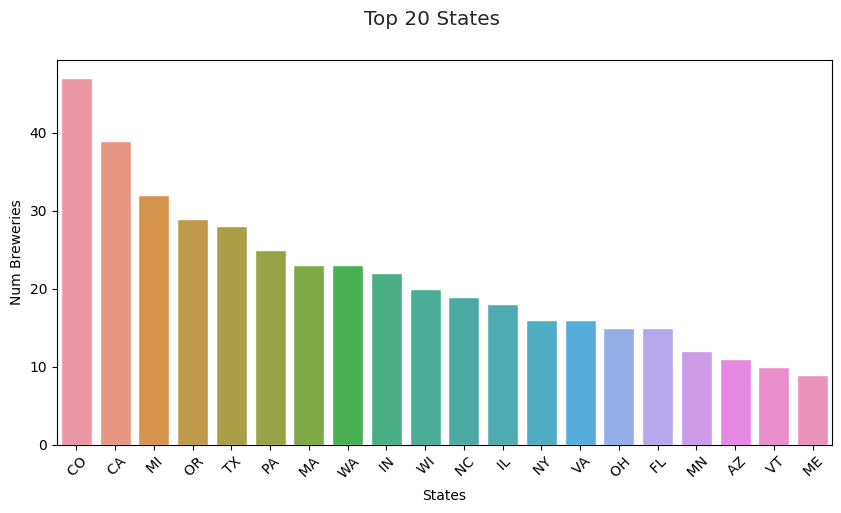

In [10]:
fig, axes = plt.subplots(sharey=True, figsize=(10,5))
sns.set_theme(style="whitegrid")
fig.suptitle('Top 20 States')
sns.barplot(x="States", y="Num Breweries", data=breweries_by_state.head(20))
plt.xticks(rotation = 45)
plt.show()

In [11]:
breweries_citys_df = breweries['city'].value_counts().rename_axis('City').reset_index(name='Num Breweries')
breweries_citys_df.head()

,City,Num Breweries
0,Portland,17
1,Seattle,9
2,Boulder,9
3,Chicago,9
4,Austin,8


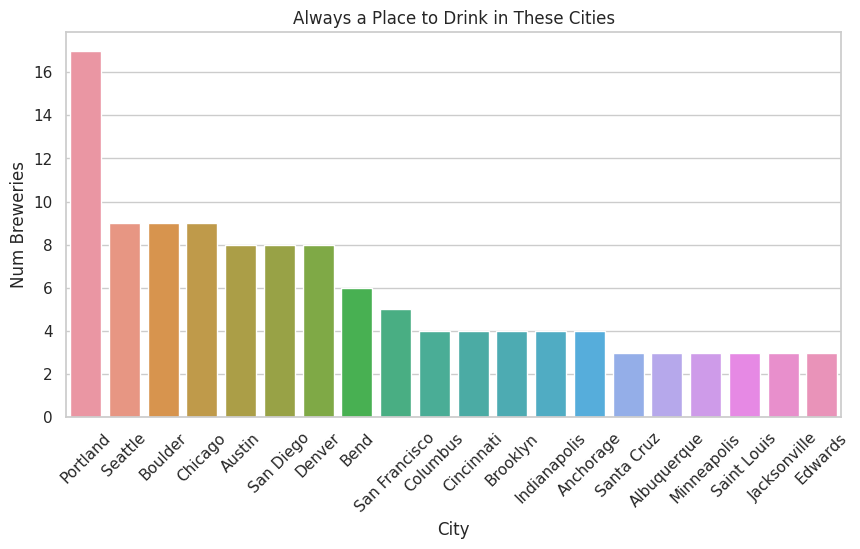

In [12]:
fig, axes = plt.subplots(sharey=True, figsize=(10,5))
sns.set_theme(style = 'darkgrid')
sns.barplot(x='City', y='Num Breweries', data=breweries_citys_df.head(20))
plt.xticks(rotation=45)
plt.title('Always a Place to Drink in These Cities')
plt.show()

Полученные выше данные хорошие, но бесполезные. В США два Портленда, так что нужно ещё посмотреть в разрезе "штат"-"город", где больше всего пивоварен.

In [31]:
breweries.groupby(['state', 'city']).agg({'name': 'count'}).reset_index().sort_values('name', ascending=False).head(10)

,state,city,name
291,OR,Portland,11
107,IL,Chicago,9
44,CO,Boulder,9
377,WA,Seattle,9
331,TX,Austin,8
48,CO,Denver,8
31,CA,San Diego,8
174,ME,Portland,6
285,OR,Bend,6
32,CA,San Francisco,5


Ниже график с ТОП 20 вариантов вида пива/сидра/эля и прочих прекрасных напитков. Можно посмотреть на самые популярные виды напитков. Видно, что самое популярное пиво - American IPA.

In [13]:
top_beers = beers['style'].value_counts().rename_axis('Beers').reset_index(name='Total')
top_beers.head()

,Beers,Total
0,American IPA,424
1,American Pale Ale (APA),245
2,American Amber / Red Ale,133
3,American Blonde Ale,108
4,American Double / Imperial IPA,105


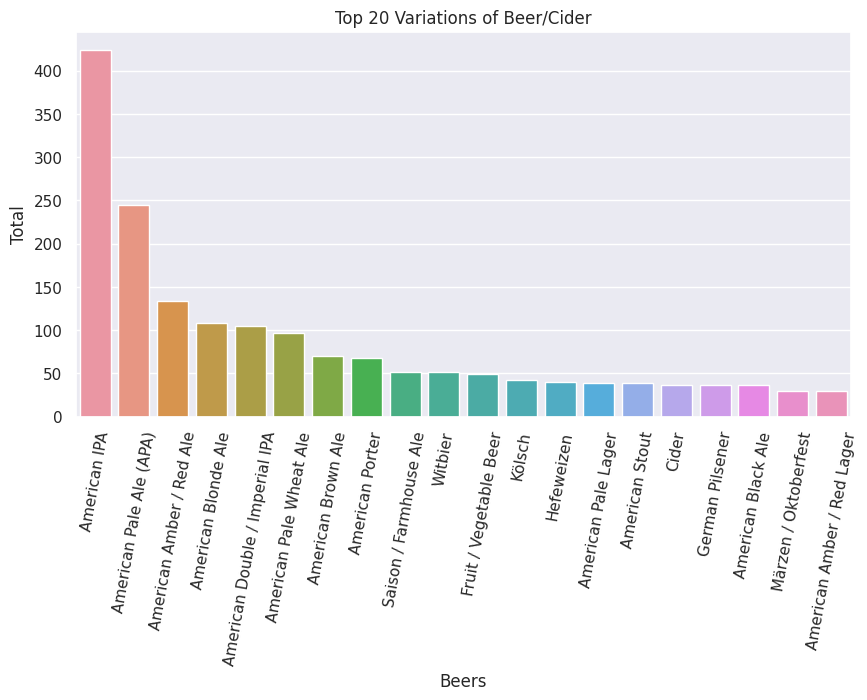

In [14]:
fig, axes = plt.subplots(sharey=True, figsize=(10,5))
sns.set_theme(style = 'darkgrid')
sns.barplot(x='Beers', y='Total', data=top_beers.head(20))
plt.xticks(rotation=80)
plt.title('Top 20 Variations of Beer/Cider')
plt.show()

Графики распределения крепости алкоголя по градусам и горечи.

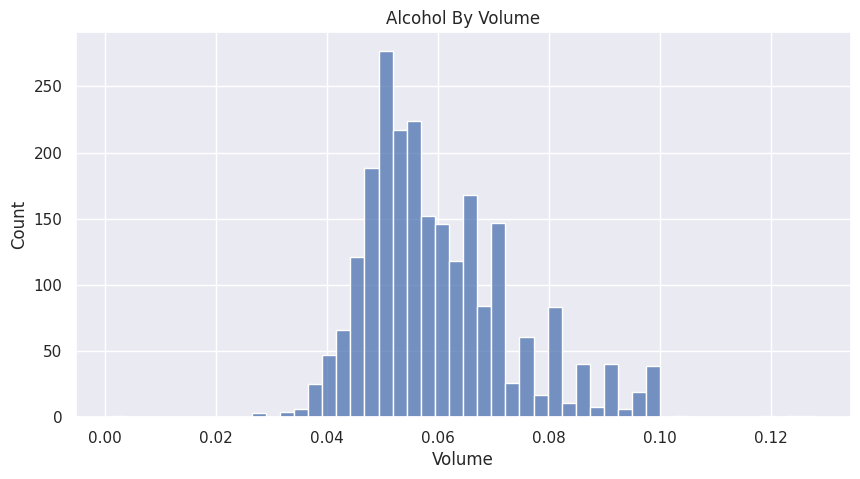

In [15]:
fig, axes = plt.subplots(sharey=True, figsize=(10,5))
sns.set_theme(style = 'darkgrid')

sns.histplot(beers['abv'])
plt.title('Alcohol By Volume')
plt.xlabel("Volume")
plt.show()

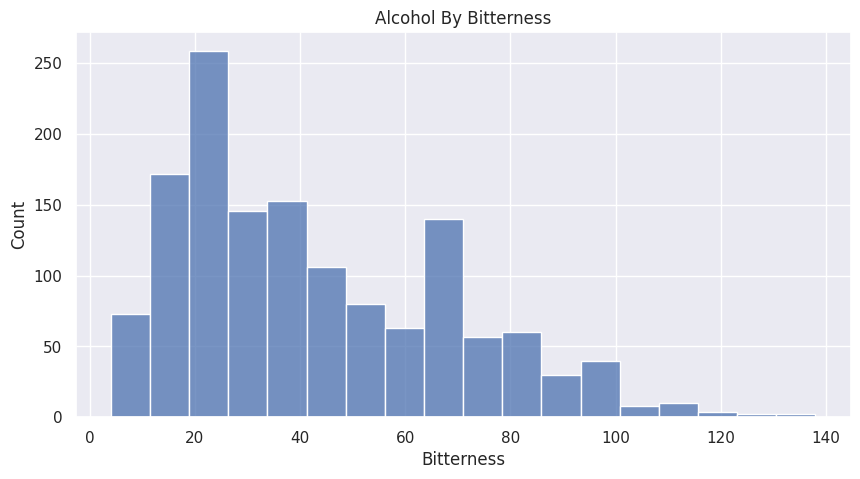

In [16]:
fig, axes = plt.subplots(sharey=True, figsize=(10,5))
sns.set_theme(style = 'darkgrid')

sns.histplot(beers['ibu'])
plt.title('Alcohol By Bitterness')
plt.xlabel("Bitterness")
plt.show()

Интересно посмотреть зависимость между горечью пива и крепостью в градусах. В целом, можно наблюдать довольно сильную кореляцию (расчёт ниже показал 0.67, неплохой результат).

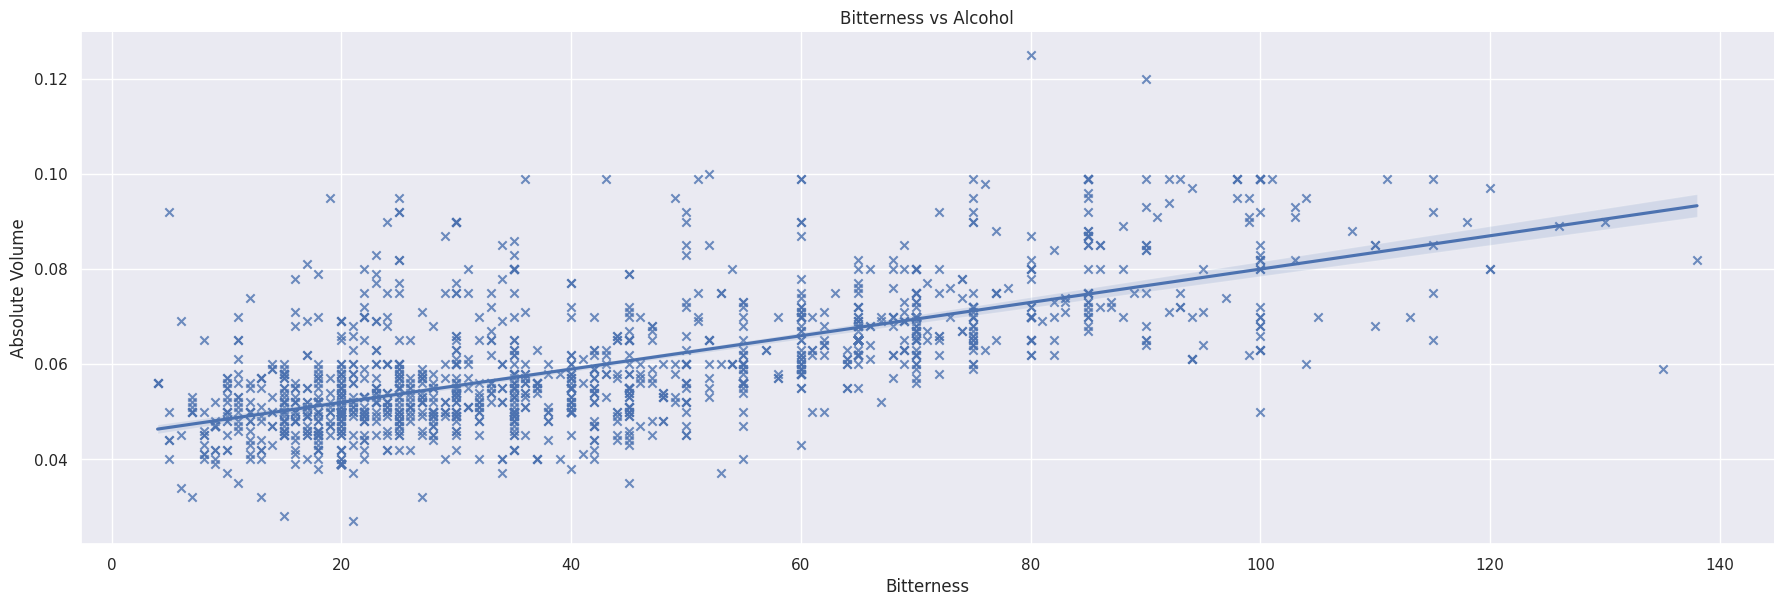

In [17]:
sns.lmplot(data = beers, x="ibu", y="abv", markers="x", height=6, aspect=3)
plt.xlabel("Bitterness")
plt.ylabel("Absolute Volume")
plt.title("Bitterness vs Alcohol")
plt.show()

In [18]:
beers[['abv', 'ibu']].corr()

,abv,ibu
abv,1.000000,0.670621
ibu,0.670621,1.000000


На этом всё. Какие выводы мы можем сделать на основе наших данных?

1) В США очень любят American IPA.

2) Больше всего пивоварен расположено в Портленде, и это совершенно бесполезная для нас информация, ведь есть Портленд в шате Мэн и Портленд в штате Орегон. Путём легкого уточнения данных выясняется, что больше всего именно в Орегоне.

3) Если построить графики распределения, то видно, что крепость пива имеет вполне даже нормальное распределение. А вот горечь скошена влево.

4) Между крепостью и горечью есть кореляция 0.67. Это показывают вычисления и это хорошо видно на графике. Чем пиво горьче, тем оно крепчен.

На этом всё. Надеюсь, было интересно.